Andrea Carolina Carrillo

Taller #4

Bioproject: PRJNA926949

Link de secuencia elegida: https://trace.ncbi.nlm.nih.gov/Traces/?view=run_browser&acc=SRR23493805&display=metadata

Descargué archivo en FASTQ comprimido. (SRR23493805)


Sitúo el archivo fastq en carpeta de Apolo llamada: Lactobacillus (Hecho en subsistema Linux)

In [ ]:
scp SRR23493805.fastq.gz accarrillg@apolo.eafit.edu.co:/home/accarrillg/lactobacillus/ 
gzip -d SRR23493805.fastq.gz #descomprimiendo archivo

In [ ]:
#Cargando python
module load python/3.6.0_miniconda-4.3.11_gcc-11.2.0

#Creando ambiente y activando ambiente
conda create --name slurmt conda activate slurmt

#Instalando software y paquetes
#Fastq
conda install -c bioconda fastqc

#Trimmomatic
conda install -c bioconda trimmomatic

#ABySS
conda install -c bioconda abyss

#SPAdes
conda install -c bioconda spades

Revisión de lecturas:

Fastqc es un programa que leerá los archivos de secuencia sin procesar (fastq) y realizará un control de calidad de los datos. Elaborará un informe que resuma la información.

Ejecutaremos fastqc antes y después del trimado para ver el efecto en la calidad de los datos resultantes.


In [ ]:
#Cheking quality reads
fastqc ../lactobasillus/SRR23493805.fastq
#Descargando archivo en .html (código en terminal linux)
scp accarrillg@apolo.eafit.edu.co:/home/accarrillg/lactobacillus/SRR23493805_fastqc.html .

Resultado del link html:

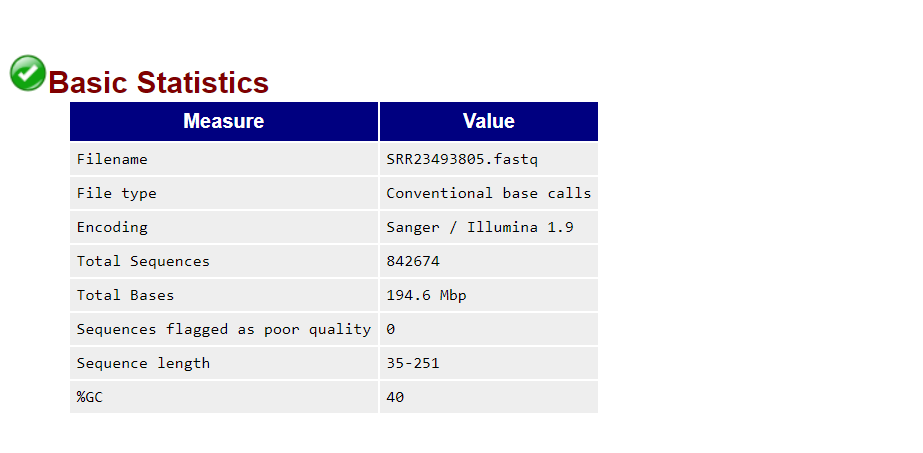



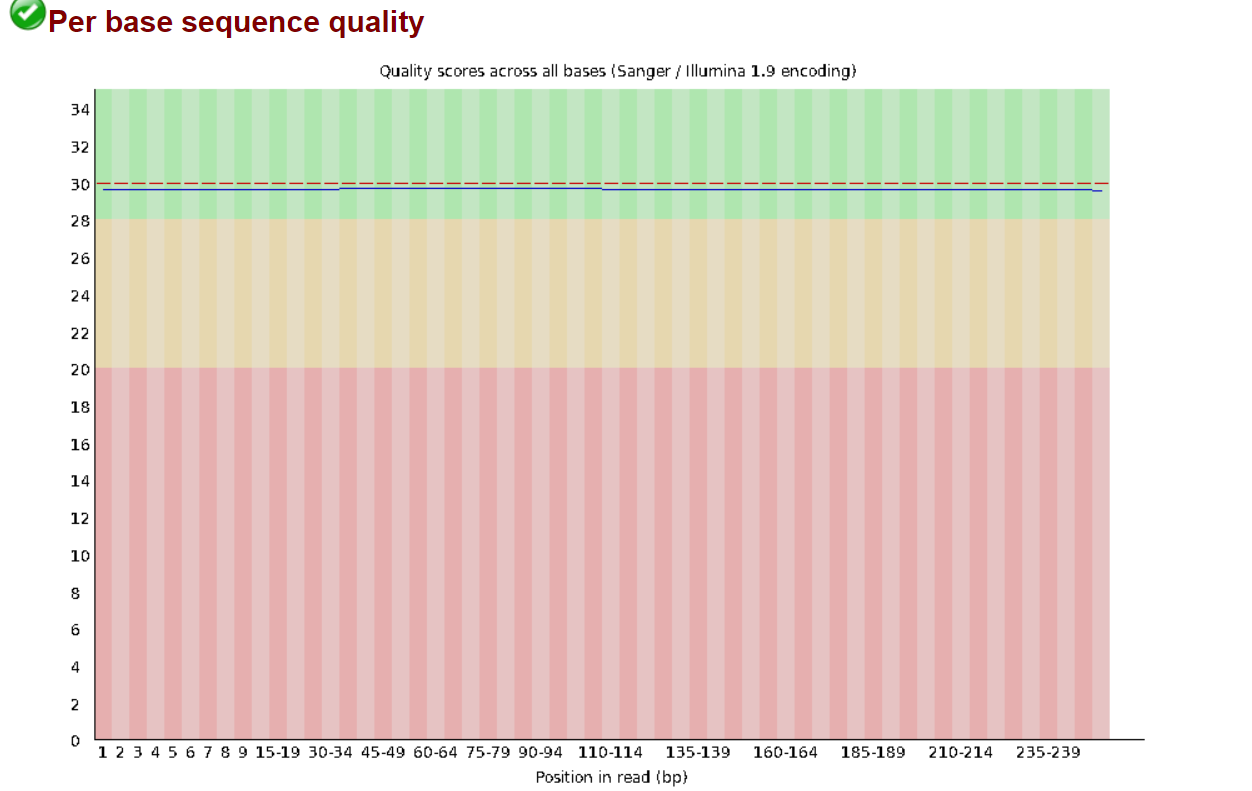


ANÁLISIS GRÁFICA

 En la gráfica podemos observar un eje x correspondiente a la posición de lectura con respecto a los pares de bases; y en el eje y tenemos Q o quality score por pares de bases. También vemos que la gráfica se divide en 3 partes de diferentes colores: verde, amarillo y rojo en donde cada una representa una calidad buena, mediana y mala, respectivamente.

 En este caso podemos observar una línea horizontal uniforme, situada en un quality score de casi 30, por lo que la calidad es buena, casi de un 99.9% de precisión de que la base sea correctamente nombrada.


In [ ]:
#Trimando lecturas previas
trimmomatic SE -threads 4 -phred33 ../lactobacillus/SRR23493805.fastq trimmed.fastq SLIDINGWINDOW:4:20 MINLEN:25 

#Calidad final
fastqc trimmed.fastq

#Descargo .html de archivo trimado (trimmed.fastq) en subsistema Linux por medio de este código:
scp accarrillg@apolo.eafit.edu.co:/home/accarrillg/lactobacillus/trimmed_fastqc.html .




Resultado de trimmed_fastqc.html:

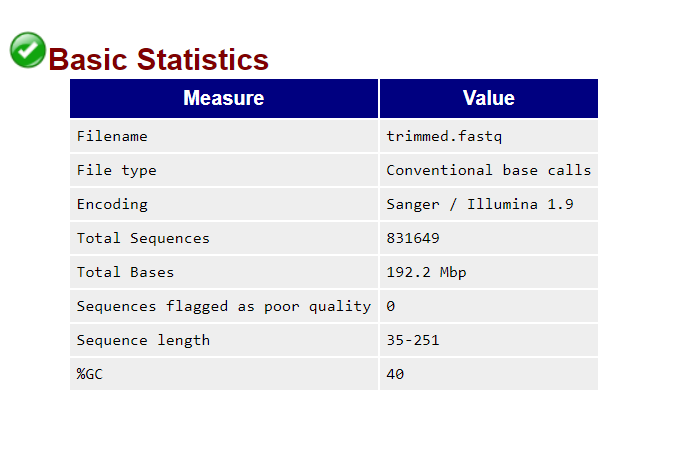

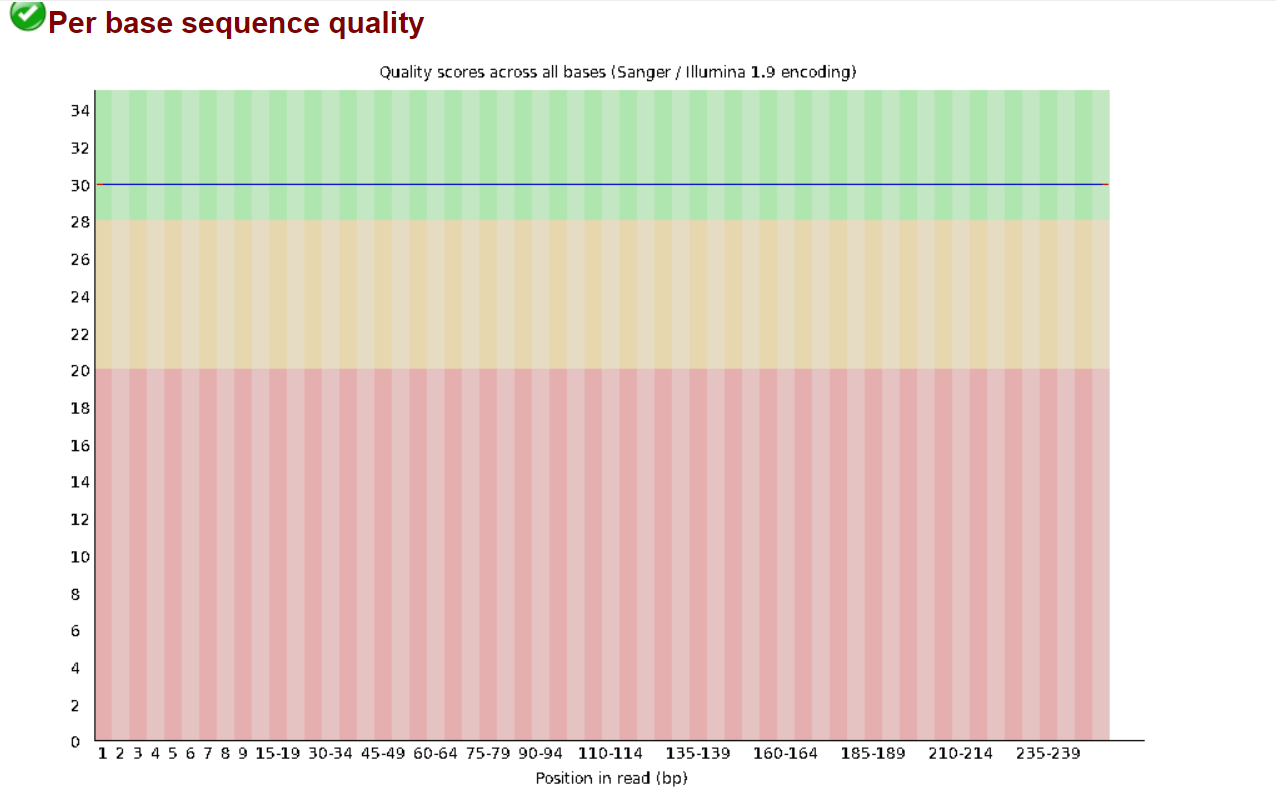

ANÁLSIS GRÁFICA TRIMADA

Acá podemos observar que al usar un minlen:25 la gráfica cambia solo un poco, la línea es un poco más recta y está situada exactamente en el Q 30. Esto como anteriormente dijimos significa que la calidad mejoró un poco, y aparte que hay acerca de un 99.9% de recisión de que la base sea correctamente nombrada y que existe una probabilidad de error de base de 1 en 1000.

**ENSAMBLE**

**ABySs** es un programa usado para ensamblar genomas a partir de secuencias cortas de ADN. 

Se usaron 3 k-mers (subcadenas de la longitud k contenidas dentro de una secuencia biológica) distintos: k=63, k=78 y k=120 y obtuvimos distintos parámetros.



In [ ]:
#ABySS anssembly
abyss-pe k=63 se=trimmed.fastq name=trimmedtable 
#AByss stats
abyss-fac trimmedtable-unitigs.fa


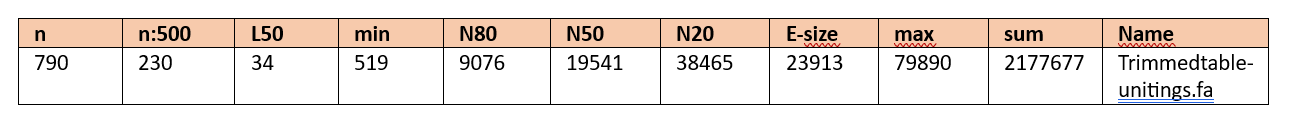

In [ ]:
#ABySS anssembly
abyss-pe k=78 se=trimmed.fastq name=trimmedtable2
#AByss stats
abyss-fac trimmedtable2-unitigs.fa

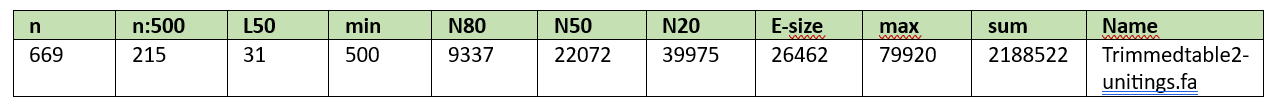

In [ ]:
#ABySS anssembly
abyss-pe k=120 se=trimmed.fastq name=trimmedtable2
#AByss stats
abyss-fac trimmedtable2-unitigs.fa

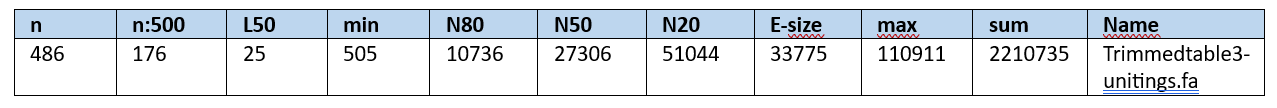

**Interpretación de parámetros dados en las tablas:**

n: Indica el número de secuencias en el ensamblaje del genoma.

n:500 Indica el número total de bases en las secuencias del ensamblaje del genoma.

L50: Indica el número mínimo de secuencias que representan el 50% del genoma ensamblado.

min:  Indica la longitud mínima de las secuencias en el ensamblaje del genoma.

N80: Indica la longitud de la secuencia más corta que representa el 80% del genoma ensamblado.

N50: Indica la longitud de la secuencia más corta que representa el 50% del genoma ensamblado.

N20: Indica la longitud de la secuencia más corta que representa el 20% del genoma ensamblado.

ESIZE: Indica el tamaño estimado del genoma ensamblado.

MAX: Indica la longitud máxima de las secuencias en el ensamblaje del genoma.

SUM: Indica la suma total de las longitudes de todas las secuencias en el ensamblaje del genoma.

NAME: Es el nombre del archivo que contiene las secuencias del genoma ensamblado.

Estas estadísticas son útiles para evaluar la calidad y la completitud del ensamblaje del genoma.


Ensamble de referencia:

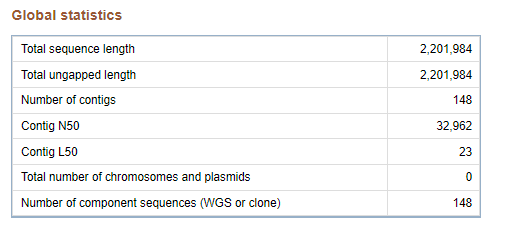

Como podemos observar los parámetros son distintos a los dados en las tablas resultantes, sin embargo podemos ver que a medida de que nuestro K-mer es más grande más similitud hay entre los dos. Con k=63, obtuvimos un L50 de 34, mientras que con un k=120, obtuvimos un L50 de 25.
